In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Golden_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
Golden_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
rc = pd.read_csv('roller_coasters.csv')
Golden_wood.head(10)
#rc.head()


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
5,6,Ravine Flyer II,Waldameer,"Erie, Pa.",Gravity Group,2008,712,2013
6,7,Outlaw Run,Silver Dollar City,"Branson, Mo.",Rocky Mountain,2013,599,2013
7,8,The Beast,Kings Island,"Kings Mills, Ohio",KECO,1979,555,2013
8,9,Lightning Racer,Hersheypark,"Hershey, Pa.",GCII,2000,364,2013
9,10,Shivering Timbers,Michigan’s Adventure,"Muskegon, Mich.",CCI,1998,304,2013


In [5]:
Golden_wood.groupby('Name').Park.nunique()


Name
American Thunder    1
Balder              1
Beast               1
Blue Streak         3
Boardwalk Bullet    1
                   ..
Wild One            1
Wildfire            1
Wodan               1
Wood Coaster        1
Wooden Warrior      1
Name: Park, Length: 61, dtype: int64

In [6]:
Golden_wood.Name.nunique()

61

In [7]:
Golden_wood.Name.unique()

array(['Boulder Dash', 'El Toro', 'Phoenix', 'The Voyage', 'Thunderhead',
       'Ravine Flyer II', 'Outlaw Run', 'The Beast', 'Lightning Racer',
       'Shivering Timbers', 'Gold Striker', 'Balder', 'Lightning Rod',
       'Goliath', 'Prowler', 'The Raven', 'The Legend', 'Giant Dipper',
       'Colossos', 'Jack Rabbit', 'Thunderbolt', 'Cú Chulainn', 'Wodan',
       'Troy', 'Comet', 'Cyclone', 'Wildfire', 'GhostRider',
       'Playland Wooden Coaster', 'The Boss', 'Wild Mouse',
       'American Thunder', 'White Lightning', 'Megafobia', 'Hades 360',
       'Rampage', 'Blue Streak', 'Screamin’ Eagle', 'Tremors',
       'Flying Turns', 'Racer', 'T Express', 'Twister', 'Wooden Warrior',
       'Kentucky Rumbler', 'Wood Coaster', 'Boardwalk Bullet', 'Voyage',
       'Beast', 'Mystic Timbers', 'Raven', 'Legend', 'Boss', 'Switchback',
       'Grizzly (KD)', 'Grand National', 'Renegade', 'Rutschebanan',
       'Grizzly', 'Wild One', 'Mine Blower'], dtype=object)

In [18]:
Golden_wood.Supplier.nunique()

32

In [19]:
Golden_steel.Supplier.nunique()

15

In [20]:
Golden_wood.groupby('Year of Rank').Rank.nunique()

Year of Rank
2013    10
2014    10
2015    10
2016    49
2017    48
2018    47
Name: Rank, dtype: int64

In [21]:
Golden_steel.groupby('Year of Rank').Rank.nunique()

Year of Rank
2013    10
2014    10
2015    10
2016    45
2017    45
2018    49
Name: Rank, dtype: int64

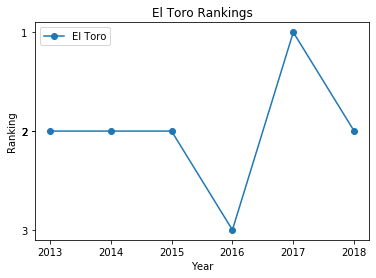

<Figure size 432x288 with 0 Axes>

In [26]:
def rank_year(Coaster_name,park_name, ranking_df):
    coaster_ranking = ranking_df[(ranking_df['Name']== Coaster_name)&(ranking_df['Park'] == park_name)]
    ax = plt.subplot()
    ax.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'],marker= 'o')
    ax.set_yticks(coaster_ranking['Rank'])
    ax.set_xticks(coaster_ranking['Year of Rank'])
    ax.invert_yaxis()
    plt.title("{} Rankings".format(Coaster_name))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend([Coaster_name])
    plt.show()
    
rank_year('El Toro', 'Six Flags Great Adventure', Golden_wood)
plt.clf()

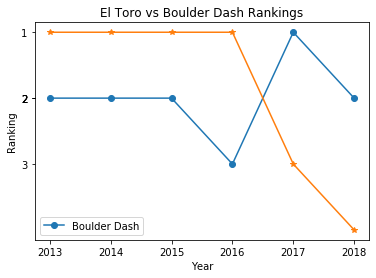

<Figure size 432x288 with 0 Axes>

In [34]:
def rank_year(Coaster_name,Coaster_name2,park_name,park_name2, ranking_df):
    coaster_ranking = ranking_df[(ranking_df['Name']== Coaster_name)&(ranking_df['Park'] == park_name)]
    coaster_ranking2 = ranking_df[(ranking_df['Name']== Coaster_name2)&(ranking_df['Park'] == park_name2)]
    ax = plt.subplot()
    ax.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'],marker= 'o', label = Coaster_name)
    ax.plot(coaster_ranking2['Year of Rank'], coaster_ranking2['Rank'],marker= '*',label = Coaster_name2)
    ax.set_yticks(coaster_ranking['Rank'])
    ax.set_xticks(coaster_ranking['Year of Rank'])
    ax.invert_yaxis()
    plt.title("{} vs {} Rankings".format(Coaster_name, Coaster_name2))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend([Coaster_name])
    plt.legend([Coaster_name2])
    plt.show()
    
rank_year('El Toro','Boulder Dash','Six Flags Great Adventure','Lake Compounce' ,Golden_wood)
plt.clf()

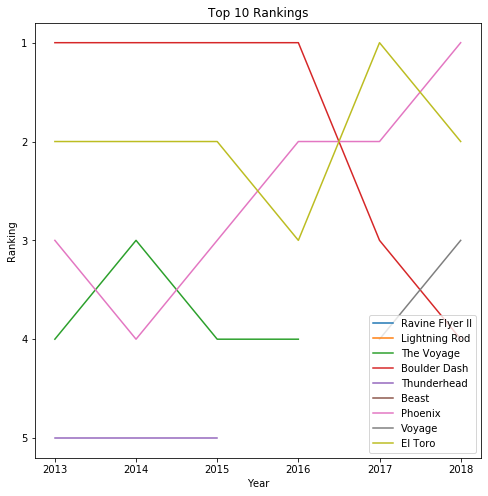

<Figure size 432x288 with 0 Axes>

In [45]:
def plot_top_n(rankings_df,n):
  top_n_rankings = rankings_df[rankings_df['Rank'] <= n]
  fig, ax = plt.subplots(figsize=(8,8))
  for coaster in set(top_n_rankings['Name']):
    coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
  ax.set_yticks([i for i in range(1,6)])
  ax.invert_yaxis()
  plt.title("Top 10 Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

plot_top_n(Golden_wood,5)
plt.clf()


In [48]:
df = pd.read_csv('roller_coasters.csv')
df.head(10)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
5,Bat Coaster,Steel,Inverted,70.0,20.0,400.0,2.0,Pinfari,Nigloland,status.relocated
6,Batman : Arkham Asylum,Steel,Inverted,80.0,32.0,823.0,5.0,B&M,Parque Warner Madrid,status.operating
7,Big Thunder Mountain,Steel,Sit Down,60.0,22.0,1500.0,0.0,Vekoma,Disneyland Park,status.operating
8,EqWalizer,Steel,Sit Down,76.0,36.0,285.0,3.0,Vekoma,Walibi Rhône Alpes,status.operating
9,Calamity Mine,Steel,Sit Down,48.0,14.0,785.0,0.0,Vekoma,Walibi Belgium,status.operating


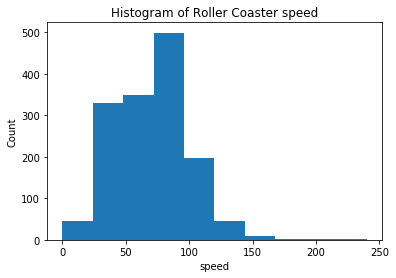

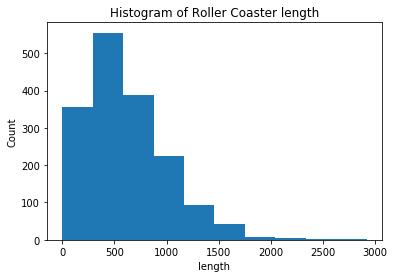

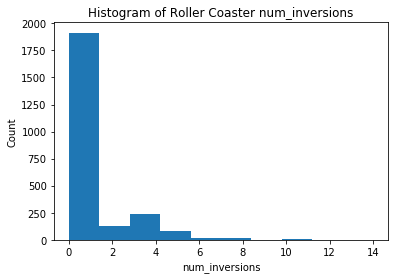

<Figure size 432x288 with 0 Axes>

In [55]:
def histy(column_name,ranking_df):
    plt.hist(ranking_df[column_name].dropna())
    plt.title('Histogram of Roller Coaster {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()
histy('speed',df)
plt.clf()
histy('length',df)
plt.clf()
histy('num_inversions',df)
plt.clf()



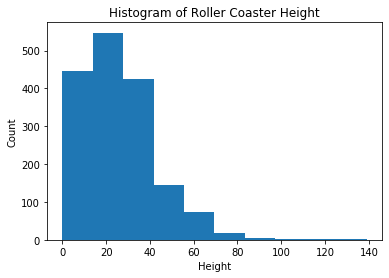

<Figure size 432x288 with 0 Axes>

In [57]:
def plot_height_histogram(coaster_df):
  heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
  plt.hist(heights)
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()

plot_height_histogram(df)
plt.clf()


C:\Users\LAWAL\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


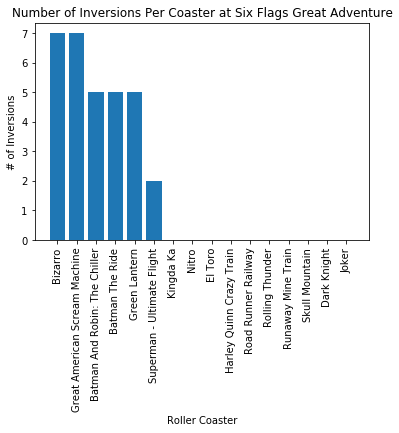

In [62]:
def bar_inversion(coaster_df,park_name):
  park_coasters = coaster_df[coaster_df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions',  ascending=False)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  plt.bar(range(len(number_inversions)),number_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)
  plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
  plt.xlabel('Roller Coaster')
  plt.ylabel('# of Inversions')
  plt.show
bar_inversion(df,'Six Flags Great Adventure')


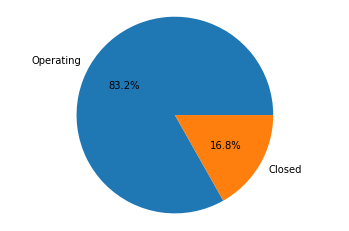

<Figure size 432x288 with 0 Axes>

In [64]:
def pie_chart_status(coaster_df):
  operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
  closed_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
  num_operating_coasters = len(operating_coasters)
  num_closed_coasters = len(closed_coasters)
  status_counts = [num_operating_coasters,num_closed_coasters]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
  plt.axis('equal')
  plt.show()

pie_chart_status(df)
plt.clf()

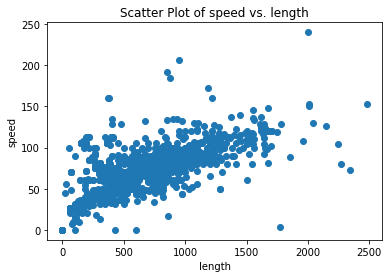

<Figure size 432x288 with 0 Axes>

In [72]:
def plot_scatter(coaster_df, column_x, column_y):
  plt.scatter(coaster_df[column_x],coaster_df[column_y])
  plt.title('Scatter Plot of {} vs. {}'.format(column_y,column_x))
  plt.xlabel(column_x)
  plt.ylabel(column_y)
  plt.show()
plot_scatter(df,'length','speed')
plt.clf()

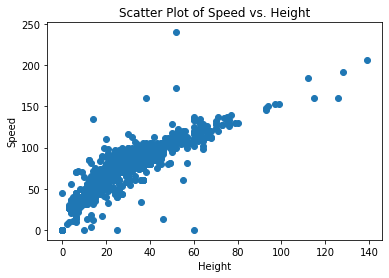

In [71]:
def plot_scatter_height_speed(coaster_df):
  coaster_df = coaster_df[coaster_df['height'] < 140]
  plt.scatter(coaster_df['height'],coaster_df['speed'])
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()

plot_scatter_height_speed(df)